# Predicting the Sale Price of Bulldozers Using Machine Learning

This is my learning project when taking Machine Learning 0-Master course on Udemy. The goal of predicting the sale price of bulldozer, and this is a time-series related project. The original project is from Kaggle.

## 1. Problem definition
How well can we predict the future sale price of a bulldozer, giving the characterics and the previous examples of how much similar bulldozers have been sold for?

## 2. Data
The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

View and download the benchmark code from Github:
https://github.com/benhamner/BluebookForBulldozers/tree/master/Benchmark


The data  is split into three parts:

1. Train.csv is the training set, which contains data through the end of 2011.

2. Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

3. Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluataion
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more the evaluation of the this project, please check:
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

## 4. Features

Kaggle provides a data dictionary detailing all the features of the dataset. You can download the data dictionary 
here:

https://www.kaggle.com/c/bluebook-for-bulldozers/data?select=Data+Dictionary.xlsx

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# import training and validation sets

df = pd.read_csv("../project_bulldozer/bluebook-for-bulldozers/TrainAndValid.csv", low_memory = False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [12]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

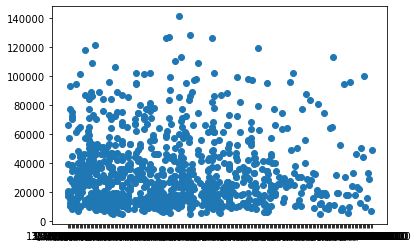

In [15]:
# Plot the scatter for the sale price and the sale date

fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000]);

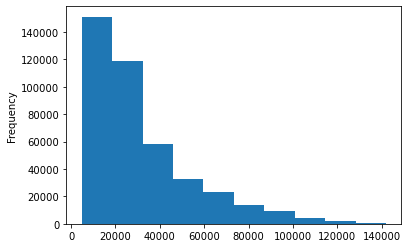

In [17]:
df.SalePrice.plot.hist();

In [19]:
df.saledate.dtype # original data type before parse_date

dtype('O')

## Parsing Dates

When we work with series data, we want to enrich the date & time component as much as possible. We can do that by telling pandas which of our columns has dates in using `parse_date` parameter.

In [4]:
# import data again, but this time with parse_date

df = pd.read_csv("../project_bulldozer/bluebook-for-bulldozers/TrainAndValid.csv", 
                 low_memory = False,
                 parse_dates = ['saledate'])

In [21]:
df.saledate.dtype # new data type after parse_date

dtype('<M8[ns]')

In [4]:
df.saledate.value_counts()

2009-02-16    1932
2012-02-13    1598
2011-02-15    1352
2008-02-19    1300
2010-02-15    1219
              ... 
2012-02-04       1
2010-04-03       1
2005-03-03       1
2006-07-06       1
2007-05-07       1
Name: saledate, Length: 4013, dtype: int64

In [5]:
df.saledate[:1000] # a clean date data

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

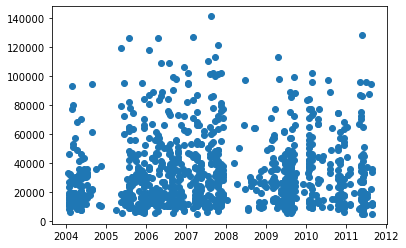

In [26]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000]);

In [27]:
df.head(20) # too many columns, can't see them all, so we transpost the data

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1139255,26500.0,1001274,4605,121,3.0,2004,508.0,Low,2008-12-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,21000.0,772701,1937,121,3.0,1993,11540.0,High,2004-08-26,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
7,1139261,27000.0,902002,3539,121,3.0,2001,4883.0,High,2005-11-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1139272,21500.0,1036251,36003,121,3.0,2008,302.0,Low,2009-08-27,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
9,1139275,65000.0,1016474,3883,121,3.0,1000,20700.0,Medium,2007-08-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [28]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.000000,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.000000,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.000000,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [29]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

## Sort data frame by sorting saledate

When working with time series data, it is a good idea to sort it by date

In [6]:
df.sort_values(by =["saledate"],inplace=True,ascending =True)

In [7]:
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Make a copy of the original data frame

We make a copy of the original data frame so we can manipulate the copy, we have just got out from our data

In [8]:
# make a copy
df_temp = df.copy()

In [9]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


## Add datetime parameters for `saledate`  column

In [9]:
df_temp['saleYear'] = df_temp.saledate.dt.year
df_temp['saleMonth'] = df_temp.saledate.dt.month
df_temp['saleDay'] = df_temp.saledate.dt.day
df_temp['saleDayOfWeek'] = df_temp.saledate.dt.dayofweek
df_temp['saleDayOfYear'] = df_temp.saledate.dt.dayofyear

In [11]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [10]:
# Nowe we have enriched our DataFrame with date time features, now we can remove "saledate"
df_temp.drop("saledate", axis =1, inplace = True)

In [13]:
df_temp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [53]:
# check the values of different column
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [54]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

### Convert string to category 

One way we can turn all of our data into numbers is by converting them into pandas categories.

We can check the different datatypes compitable with pandas: (google pandas api datatype)
https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html

In [56]:
pd.api.types.is_string_dtype(df_temp["Travel_Controls"])

True

In [63]:
# Find the columns which contain astrings
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [11]:
# This will convert astring into category
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [65]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [66]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [67]:
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [15]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas now we have a way to access all our data in the form of numbers. 
But we still have a bunch of missing data.

In [71]:
df_temp.isnull().sum()/ len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data

In [16]:
# Export current temp data frame
df_temp.to_csv("../project_bulldozer/train_tempt.csv", index = False)

In [2]:
# Import preprocessed data

df_temp = pd.read_csv("../project_bulldozer/train_tempt.csv", low_memory = False)

In [74]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Fill in missing value

### Fill nummerical missing values first

In [77]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [8]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [3]:
# Fill the numeric row with mediam
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
        # Add a binary column which tells us was the data missing
            df_temp[label + "_is_missing "] = pd.isnull(content)
        # Fill missing numeric values with mediam
            df_temp[label] = content.fillna(content.median())

In [14]:
# Check if there is any null numeric values

for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [104]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 59 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SalesID                               412698 non-null  int64  
 1   SalePrice                             412698 non-null  float64
 2   MachineID                             412698 non-null  int64  
 3   ModelID                               412698 non-null  int64  
 4   datasource                            412698 non-null  int64  
 5   auctioneerID                          412698 non-null  float64
 6   YearMade                              412698 non-null  int64  
 7   MachineHoursCurrentMeter              412698 non-null  float64
 8   UsageBand                             73670 non-null   object 
 9   fiModelDesc                           412698 non-null  object 
 10  fiBaseModel                           412698 non-null  object 
 11  

In [109]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Filling and tuning categorical variables into numbers

In [20]:
# Check for columns which are not numbers

for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [113]:
pd.Categorical(df_temp['state'])

['Texas', 'Florida', 'Florida', 'Florida', 'Florida', ..., 'California', 'California', 'California', 'California', 'California']
Length: 412698
Categories (53, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming']

In [4]:
# Turn categorical variables into numbers and fill missing

for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary columns to indicate weather sample had missing values
        df_temp[label+"_is_missing"] = pd.isnull(content)
        # Turn categorical variables into numbers and add 1 (to avoid negative values)
        df_temp[label] = pd.Categorical(content).codes+1

In [118]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [16]:
# Check if there still is missing value:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## 5. Modelling

### 5.1 Random Forest Regressor and RandomSearchCV

In [23]:
%%time
# to estimate how much time is needed to run the code
# Instantiate the moedel with RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_jobs = -1,
                             random_state =42)

# Fit the rf_model (with the whole data frame without split it first)
rf_model.fit(df_temp.drop('SalePrice', axis = 1), df_temp['SalePrice'])

Wall time: 9min 12s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [24]:
# Score the rf_model

rf_model.score(df_temp.drop('SalePrice', axis = 1), df_temp['SalePrice'])

0.9875468079970562

In [5]:
# split the data into train and validation set
df_val = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [6]:
# Split the data into X and Y

X_train, Y_train = df_train.drop("SalePrice", axis = 1), df_train["SalePrice"]
X_val, Y_val = df_val.drop("SalePrice", axis =1), df_val["SalePrice"]

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape


((401125, 102), (401125,), (11573, 102), (11573,))

In [19]:
%%time
# to estimate how much time is needed to run the code (the whole dataset)
# Instantiate the moedel
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_jobs = -1,
                             random_state =42)

# Fit the model
rf_model.fit(X_train, Y_train)

Wall time: 8min 5s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [22]:
# Score the rf_model
rf_model.score(X_train, Y_train)

0.9875150955953674

In [20]:
%%time
# Reduce the samples by setting max_samples, so it is faster and easier to experiment with data
from sklearn.ensemble import RandomForestRegressor
rf_model_reduce = RandomForestRegressor(n_jobs = -1,
                                     random_state = 42,
                                     max_samples = 100000)
rf_model_reduce.fit(X_train, Y_train)

Wall time: 2min 36s


RandomForestRegressor(max_samples=100000, n_jobs=-1, random_state=42)

In [21]:
# Score the rf_model_reduce
rf_model_reduce.score(X_train, Y_train)

0.9389791835237717

## Build an evaluation fucntion:

In [7]:
# Create an evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(Y_test, Y_preds):
  '''
  Caculate root mean square log error between prediction and true labels
  '''

  return np.sqrt (mean_squared_log_error(Y_test, Y_preds))

# Create function to evaluate model on a few different levels
def show_score(load_job_model):
  train_preds = load_job_model.predict(X_train)
  val_preds = load_job_model.predict(X_val)
  scores = {"Training MAE":mean_absolute_error(Y_train, train_preds),
            "Valid MAE":mean_absolute_error(Y_val, val_preds),
            "Training RMSLE": rmsle(Y_train, train_preds),
            "Valid RMSLE":rmsle(Y_val, val_preds),
            "Training R^2":r2_score(Y_train, train_preds),
            "Val R^2":r2_score(Y_val, val_preds)}

  return scores

In [25]:
show_score(rf_model)

{'Training MAE': 1578.2015208725463,
 'Valid MAE': 6120.959637950402,
 'Training RMSLE': 0.08426351714047395,
 'Valid RMSLE': 0.25557446689440955,
 'Training R^2': 0.9875150955953674,
 'Val R^2': 0.8727175969771312}

In [26]:
show_score(rf_model_reduce)

{'Training MAE': 3588.5677039077596,
 'Valid MAE': 6193.733662835912,
 'Training RMSLE': 0.17533085989490504,
 'Valid RMSLE': 0.25674596551158657,
 'Training R^2': 0.9389791835237717,
 'Val R^2': 0.8710523572862298}

## Hyperparameter tuning with RandomizedSearchCV


In [32]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":np.arange(10, 100, 10),
           "max_depth":[None, 3, 5, 10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2),
           "max_features":[0.5, 1, "sqrt","auto"],
           "max_samples":[100000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                    random_state = 42),
                                                    param_distributions = rf_grid,
                                                    n_iter = 30,
                                                    cv = 5,
                                                    verbose = True)

rs_model.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 53.4min finished


Wall time: 54min 33s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [100000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [36]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_samples': 100000,
 'max_features': 0.5,
 'max_depth': None}

## Train the model with the best hyperparameters

### Note: this was found after 100 iterations of `RandomizedSearchCV`

In [37]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

#Most ideal hyperparameters

ideal_model = RandomForestRegressor(n_estimators = 80,
                                                       min_samples_leaf = 3,
                                                       min_samples_split = 16,
                                                       max_features = 0.5,
                                                       n_jobs = -1,
                                                       max_samples = 100000,
                                                       max_depth = None,
                                                       random_state = 42)

ideal_model.fit(X_train, Y_train)

Wall time: 1min 1s


RandomForestRegressor(max_features=0.5, max_samples=100000, min_samples_leaf=3,
                      min_samples_split=16, n_estimators=80, n_jobs=-1,
                      random_state=42)

In [70]:
Y_pred_train = ideal_model.predict(X_train)
Y_pred_train

array([15498.09224053, 16409.48930544, 41341.74304803, ...,
       11635.31816555, 21292.4123886 , 13728.31572233])

In [38]:
show_score(ideal_model)

{'Training MAE': 4376.423435565565,
 'Valid MAE': 6165.481138045145,
 'Training RMSLE': 0.2073448757726305,
 'Valid RMSLE': 0.2534627431205757,
 'Training R^2': 0.9104186643638578,
 'Val R^2': 0.8727920633154227}

## Preprocessing the data for test data set

In [133]:
df_test = pd.read_csv("../project_bulldozer/bluebook-for-bulldozers/Test.csv", parse_dates = ['saledate'])

In [118]:
def preprocessor(df):
    """
    Performs transformation on df and return the transformed df.
    """
    df.sort_values(by =["saledate"],inplace=True,ascending =True)
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear
    
    # This will convert astring into category
    df.drop("saledate", axis =1, inplace = True)
    
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
    
    # Fill the numeric row with mediam
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us was the data missing
                df[label + "_is_missing "] = pd.isnull(content)
                # Fill missing numeric values with mediam
                df[label] = content.fillna(content.median())
    
    # Turn categorical variables into numbers and fill missing

    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Add binary columns to indicate weather sample had missing values
            df[label+"_is_missing"] = pd.isnull(content)
            # Turn categorical variables into numbers and add 1 (to avoid negative values)
            df[label] = pd.Categorical(content).codes+1
    
    return df_test

In [134]:
df_test = preprocessor(df_test)
df_test.head().T

,1408,1023,1728,1167,1594
SalesID,4317459,4249784,4392603,4274831,4362801
MachineID,2295526,1745722,2283116,2288988,2300591
ModelID,8132,3178,18111,3783,16490
datasource,172,172,172,172,172
auctioneerID,1,1,1,1,1
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,True,True,True,False,True


In [93]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [120]:
# We can find how the columns differ using set
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing '}

In [135]:
# Add the "auctioneerID_is_missing" into df_test

df_test["auctioneerID_is_missing "] = False
df_test.head().T

,1408,1023,1728,1167,1594
SalesID,4317459,4249784,4392603,4274831,4362801
MachineID,2295526,1745722,2283116,2288988,2300591
ModelID,8132,3178,18111,3783,16490
datasource,172,172,172,172,172
auctioneerID,1,1,1,1,1
...,...,...,...,...,...
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,True,True,True,False,True
Steering_Controls_is_missing,True,True,True,False,True


In [48]:
# Make the predction on the test set
test_preds = ideal_model.predict(df_test)

In [49]:
test_preds

array([17251.10701821, 20827.97504373, 26298.80939705, ...,
       46192.49872197, 48418.37573699, 34094.89356432])

In [54]:
test_preds = ideal_model.predict(df_test)
test_preds

NameError: name 'ideal_model' is not defined

### We have made some predctions, but the format is not the same as Kaggle is asking for

https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [55]:
# Format the predcition into the same format Kaggle is after

df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test["SalesID"]
df_preds['SalesPrice'] = test_preds

df_preds

,SalesID,SalesPrice
1408,4317459,15745.540276
1023,4249784,20036.238050
1728,4392603,25489.416505
1167,4274831,29864.837829
1594,4362801,25682.875241
...,...,...
9941,6620191,15883.383928
9936,6620142,22099.332252
11620,6635116,48716.189608
9995,6621460,47751.577009


In [56]:
# Export the predition data

df_preds.to_csv("../project_bulldozer/bluebook-for-bulldozers/df_preds")

## Feature importance

Feature importance seeks out to figure out which different attributes of the data were most impotance 
when it comes to predicting the **target variables** (SalePrice)

In [50]:
# Find the feature importance of our best model

len(ideal_model.feature_importances_)

102

In [59]:
X_train.shape

(401125, 102)

In [51]:
ideal_model.feature_importances_

array([3.12688403e-02, 1.74135280e-02, 4.36109048e-02, 1.92948065e-03,
       2.63349843e-03, 2.06535998e-01, 2.63254681e-03, 8.69649572e-04,
       4.66478394e-02, 3.47147512e-02, 6.75609955e-02, 4.59391641e-03,
       1.72047427e-02, 1.53708195e-01, 4.72438564e-02, 4.67137605e-03,
       1.69261520e-03, 3.19222419e-03, 3.98871436e-03, 7.07801672e-02,
       6.83324418e-04, 7.42570203e-05, 8.57412609e-04, 2.82930534e-04,
       1.46261052e-03, 1.62847003e-05, 3.44104758e-03, 9.19970519e-03,
       2.63954054e-04, 1.68004619e-03, 4.06641421e-03, 3.63444780e-03,
       3.82421068e-03, 8.03759085e-04, 1.24715449e-03, 6.40805343e-03,
       7.66659493e-04, 1.33453775e-02, 2.10495604e-03, 4.64497395e-03,
       1.25685393e-03, 7.90615021e-04, 4.68331747e-03, 6.38089128e-04,
       5.67928666e-04, 3.94011025e-04, 2.09793929e-04, 2.69372358e-03,
       7.95867308e-04, 2.61513085e-04, 3.81489925e-04, 6.97230748e-02,
       3.12880650e-03, 4.58623278e-03, 2.29587201e-03, 7.85970299e-03,
      

In [45]:
# Helper function for plotting feature importances

def plot_features(columns, importances, n =20):
    df = (pd.DataFrame({"features":columns,
                        "feature importances": importances})
         .sort_values("feature importances", ascending = False)
         .reset_index(drop = True))
    
    #plot the data frame
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df["feature importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importances")
    ax.invert_yaxis()

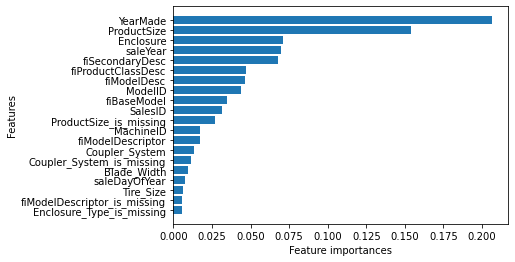

In [53]:
plot_features(X_train.columns, ideal_model.feature_importances_)

### Now we can see if we can improve the model by checking the top features, and tuning according to these features

**Question to finish** Why might knowning the feature importances of a trained machine learning model be helpful?

**Final Challenge** What other machine learning model could you try on dataset? 
Hint: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html check out the regression section of this map, or try to look at something like CatBoost.ai or XGBoost.ai



### 5.2 Catboost

In [12]:
import catboost

In [13]:
from catboost import CatBoostRegressor, Pool

In [14]:
cat_model = CatBoostRegressor(iterations=2000, verbose=200)
cat_model.fit(X_train,Y_train)

Learning rate set to 0.066989
0:	learn: 22254.7352990	total: 325ms	remaining: 10m 49s
200:	learn: 9497.5673365	total: 22.1s	remaining: 3m 17s
400:	learn: 8550.8784310	total: 55.1s	remaining: 3m 39s
600:	learn: 8091.9940558	total: 1m 21s	remaining: 3m 9s
800:	learn: 7826.7931331	total: 1m 48s	remaining: 2m 42s
1000:	learn: 7639.1349914	total: 2m 18s	remaining: 2m 18s
1200:	learn: 7488.9264599	total: 2m 54s	remaining: 1m 55s
1400:	learn: 7366.5008250	total: 3m 22s	remaining: 1m 26s
1600:	learn: 7263.9647235	total: 3m 51s	remaining: 57.6s
1800:	learn: 7177.0142181	total: 4m 15s	remaining: 28.2s
1999:	learn: 7099.5825950	total: 4m 39s	remaining: 0us


In [15]:
def show_cat_score(model):
    train_preds = abs(model.predict(X_train))
    val_preds = abs(model.predict(X_val))
    scores = {'Training Mean Absolute Error (MAE): ': mean_absolute_error(Y_train, train_preds),
              'Valid Mean Absolute Error (MAE): ': mean_absolute_error(Y_val, val_preds),
              'Training RMSLE: ': rmsle(Y_train, train_preds),
              'Valid RMSLE: ': rmsle(Y_val, val_preds),
              'Training R^2 score: ': r2_score(Y_train, train_preds),
              'Valid R^2 score: ': r2_score(Y_val, val_preds)}
    return scores

In [16]:
show_cat_score(cat_model)

{'Training Mean Absolute Error (MAE): ': 4679.802986775235,
 'Valid Mean Absolute Error (MAE): ': 6017.949033541194,
 'Training RMSLE: ': 0.23400905744160985,
 'Valid RMSLE: ': 0.2545226666113938,
 'Training R^2 score: ': 0.9050248473141591,
 'Valid R^2 score: ': 0.8816411283505794}

In [124]:
show_score(ideal_model)

{'Training MAE': 4376.423435565565,
 'Valid MAE': 6165.481138045143,
 'Training RMSLE': 0.20734487577263044,
 'Valid RMSLE': 0.25346274312057565,
 'Training R^2': 0.9104186643638578,
 'Val R^2': 0.8727920633154227}

In [18]:
%%time

#This process takes over 5 horus on Google Colab

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

cat_grid = {
    'iterations': np.arange(10, 500, 10),
    'depth': np.arange(2, 10, 2),
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': np.arange(1, 50, 1),
    'border_count': np.arange(10, 100, 10)
}

cat_model_rs = RandomizedSearchCV(estimator=cat_model,
                                 param_distributions=cat_grid,
                                 cv=5,
                                 n_iter=500,
                                 verbose=True)

cat_model_rs.fit(X_train[:100000], Y_train[:100000])


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 22200.2455187	total: 17.7ms	remaining: 7.23s
200:	learn: 12334.3710928	total: 3.13s	remaining: 3.26s
400:	learn: 10982.8322211	total: 5.85s	remaining: 131ms
409:	learn: 10948.5769291	total: 5.96s	remaining: 0us
0:	learn: 22094.3217684	total: 23ms	remaining: 9.41s
200:	learn: 12593.1106153	total: 2.99s	remaining: 3.11s
400:	learn: 11214.4252355	total: 5.67s	remaining: 127ms
409:	learn: 11171.8433672	total: 5.79s	remaining: 0us
0:	learn: 21870.8294533	total: 16ms	remaining: 6.55s
200:	learn: 12560.4744697	total: 2.68s	remaining: 2.78s
400:	learn: 11170.3970832	total: 5.25s	remaining: 118ms
409:	learn: 11137.5453760	total: 5.36s	remaining: 0us
0:	learn: 21876.8431356	total: 16ms	remaining: 6.54s
200:	learn: 12469.0886893	total: 2.63s	remaining: 2.73s
400:	learn: 11074.8247260	total: 5.52s	remaining: 124ms
409:	learn: 11035.2766752	total: 5.63s	remaining: 0us
0:	learn: 22124.0704919	total: 17.7ms	remaining: 7.24s
200:	learn: 12169.6644363	total: 2.88s	remaining: 3s
400:	learn: 10

0:	learn: 21298.0192290	total: 22.6ms	remaining: 10.8s
200:	learn: 8601.3970793	total: 4.23s	remaining: 5.87s
400:	learn: 7880.1935548	total: 8.28s	remaining: 1.63s
479:	learn: 7733.1436951	total: 9.87s	remaining: 0us
0:	learn: 22340.5015573	total: 23.7ms	remaining: 11.1s
200:	learn: 13802.9085959	total: 6.17s	remaining: 8.25s
400:	learn: 11868.9107633	total: 16.6s	remaining: 2.85s
469:	learn: 11502.5555419	total: 18.1s	remaining: 0us
0:	learn: 22230.7184073	total: 59ms	remaining: 27.7s
200:	learn: 14047.1993761	total: 5.49s	remaining: 7.35s
400:	learn: 12216.6731463	total: 10s	remaining: 1.73s
469:	learn: 11860.2320472	total: 11.5s	remaining: 0us
0:	learn: 22015.4700472	total: 23ms	remaining: 10.8s
200:	learn: 13976.8534658	total: 4.98s	remaining: 6.66s
400:	learn: 12152.7814795	total: 9.43s	remaining: 1.62s
469:	learn: 11807.7044201	total: 10.9s	remaining: 0us
0:	learn: 22026.1891319	total: 23.8ms	remaining: 11.2s
200:	learn: 13693.1115138	total: 4.76s	remaining: 6.38s
400:	learn: 11

479:	learn: 11056.2919318	total: 8.23s	remaining: 0us
0:	learn: 22055.3377923	total: 14.2ms	remaining: 6.82s
200:	learn: 12821.0390581	total: 3.17s	remaining: 4.39s
400:	learn: 11665.0070149	total: 6.25s	remaining: 1.23s
479:	learn: 11387.7817590	total: 7.51s	remaining: 0us
0:	learn: 21833.8689572	total: 15.8ms	remaining: 7.59s
200:	learn: 12739.2915444	total: 3.23s	remaining: 4.49s
400:	learn: 11569.3716095	total: 6.48s	remaining: 1.28s
479:	learn: 11319.3946477	total: 8.44s	remaining: 0us
0:	learn: 21882.0323484	total: 17.6ms	remaining: 8.44s
200:	learn: 12587.3373303	total: 3.34s	remaining: 4.63s
400:	learn: 11306.9196005	total: 7.47s	remaining: 1.47s
479:	learn: 11044.2422539	total: 8.67s	remaining: 0us
0:	learn: 22129.1919478	total: 16.4ms	remaining: 7.86s
200:	learn: 12312.6518220	total: 3.13s	remaining: 4.35s
400:	learn: 11088.7181177	total: 6.34s	remaining: 1.25s
479:	learn: 10825.3109234	total: 7.52s	remaining: 0us
0:	learn: 22338.8118573	total: 21.2ms	remaining: 6.76s
200:	le

279:	learn: 8040.8932843	total: 9.04s	remaining: 0us
0:	learn: 21472.4454498	total: 45ms	remaining: 12.6s
200:	learn: 8255.8839281	total: 11.7s	remaining: 4.59s
279:	learn: 7829.0192611	total: 16.4s	remaining: 0us
0:	learn: 21472.6392728	total: 45.7ms	remaining: 12.7s
200:	learn: 8084.5060184	total: 8.53s	remaining: 3.35s
279:	learn: 7716.7543292	total: 11.6s	remaining: 0us
0:	learn: 21684.7799556	total: 35.3ms	remaining: 9.86s
200:	learn: 8050.4152395	total: 6.62s	remaining: 2.6s
279:	learn: 7706.9529944	total: 9s	remaining: 0us
0:	learn: 21721.1096315	total: 36.6ms	remaining: 3.99s
109:	learn: 8952.1633048	total: 3.64s	remaining: 0us
0:	learn: 21662.9385377	total: 68.3ms	remaining: 7.45s
109:	learn: 9208.5607822	total: 4.03s	remaining: 0us
0:	learn: 21466.4326388	total: 34.7ms	remaining: 3.79s
109:	learn: 9162.4000218	total: 3.91s	remaining: 0us
0:	learn: 21463.3001237	total: 33.9ms	remaining: 3.69s
109:	learn: 8970.0156730	total: 4.23s	remaining: 0us
0:	learn: 21692.7033940	total: 5

200:	learn: 13833.5866718	total: 4.86s	remaining: 4.57s
389:	learn: 11944.8654275	total: 8.97s	remaining: 0us
0:	learn: 22023.7403342	total: 22.7ms	remaining: 8.82s
200:	learn: 13642.9660607	total: 4.63s	remaining: 4.35s
389:	learn: 11808.2836774	total: 8.78s	remaining: 0us
0:	learn: 22277.9615824	total: 21.4ms	remaining: 8.32s
200:	learn: 13390.5849583	total: 4.6s	remaining: 4.33s
389:	learn: 11558.6478870	total: 9.14s	remaining: 0us
0:	learn: 21803.2163220	total: 29ms	remaining: 8.39s
200:	learn: 8733.5346601	total: 5.7s	remaining: 2.52s
289:	learn: 8280.0613708	total: 8.23s	remaining: 0us
0:	learn: 21733.2669617	total: 34.6ms	remaining: 10s
200:	learn: 8972.3816185	total: 5.76s	remaining: 2.55s
289:	learn: 8472.4753918	total: 8.19s	remaining: 0us
0:	learn: 21526.7908866	total: 25.9ms	remaining: 7.5s
200:	learn: 8905.4931800	total: 5.67s	remaining: 2.51s
289:	learn: 8411.2253663	total: 8.22s	remaining: 0us
0:	learn: 21531.5634442	total: 51.8ms	remaining: 15s
200:	learn: 8788.5439684	

400:	learn: 10427.4594079	total: 11.4s	remaining: 2.24s
479:	learn: 10065.0979978	total: 13.5s	remaining: 0us
0:	learn: 22392.5433548	total: 20.1ms	remaining: 2.4s
119:	learn: 18379.1561910	total: 1.96s	remaining: 0us
0:	learn: 22279.0813536	total: 14.2ms	remaining: 1.69s
119:	learn: 18353.7942456	total: 1.9s	remaining: 0us
0:	learn: 22070.3159961	total: 14.1ms	remaining: 1.68s
119:	learn: 18135.3058732	total: 1.89s	remaining: 0us
0:	learn: 22080.0547829	total: 14.6ms	remaining: 1.73s
119:	learn: 17953.3293627	total: 1.94s	remaining: 0us
0:	learn: 22336.9266894	total: 14.1ms	remaining: 1.67s
119:	learn: 18039.1938313	total: 1.92s	remaining: 0us
0:	learn: 22299.5260077	total: 35ms	remaining: 10.8s
200:	learn: 11120.7960366	total: 8.08s	remaining: 4.38s
309:	learn: 9938.9494496	total: 12.2s	remaining: 0us
0:	learn: 22201.4216039	total: 36.8ms	remaining: 11.4s
200:	learn: 11438.6841151	total: 8.02s	remaining: 4.35s
309:	learn: 10270.4347134	total: 12.2s	remaining: 0us
0:	learn: 21987.6311

200:	learn: 9846.0305431	total: 4.15s	remaining: 3.28s
359:	learn: 8961.5356402	total: 7.45s	remaining: 0us
0:	learn: 21845.4285567	total: 22.2ms	remaining: 7.96s
200:	learn: 9730.0655240	total: 4.16s	remaining: 3.29s
359:	learn: 8848.1291177	total: 7.39s	remaining: 0us
0:	learn: 21007.1192874	total: 34.9ms	remaining: 4.5s
129:	learn: 7955.5179405	total: 4.64s	remaining: 0us
0:	learn: 20962.1763039	total: 35ms	remaining: 4.51s
129:	learn: 8200.2722067	total: 4.51s	remaining: 0us
0:	learn: 20778.8105327	total: 34.6ms	remaining: 4.46s
129:	learn: 8127.8842008	total: 4.57s	remaining: 0us
0:	learn: 20776.4242009	total: 32.2ms	remaining: 4.15s
129:	learn: 8031.4201103	total: 4.51s	remaining: 0us
0:	learn: 20946.7810618	total: 32.3ms	remaining: 4.17s
129:	learn: 7845.9702956	total: 4.53s	remaining: 0us
0:	learn: 21178.7920621	total: 32.4ms	remaining: 14.9s
200:	learn: 8050.6703978	total: 5.24s	remaining: 6.75s
400:	learn: 7404.3977384	total: 10.5s	remaining: 1.55s
459:	learn: 7297.3693183	to

200:	learn: 9763.3396435	total: 4.29s	remaining: 4.89s
400:	learn: 8749.3281568	total: 8.37s	remaining: 605ms
429:	learn: 8661.0927675	total: 8.96s	remaining: 0us
0:	learn: 21816.6156138	total: 22.3ms	remaining: 9.54s
200:	learn: 10010.8659839	total: 4.25s	remaining: 4.84s
400:	learn: 8993.9086520	total: 8.45s	remaining: 611ms
429:	learn: 8918.1807279	total: 9.04s	remaining: 0us
0:	learn: 21600.3933058	total: 25.1ms	remaining: 10.8s
200:	learn: 10011.7711715	total: 4.21s	remaining: 4.79s
400:	learn: 8910.1756887	total: 8.39s	remaining: 607ms
429:	learn: 8816.8975735	total: 8.99s	remaining: 0us
0:	learn: 21596.6303957	total: 21.1ms	remaining: 9.06s
200:	learn: 9832.2213593	total: 4.19s	remaining: 4.78s
400:	learn: 8752.8192652	total: 8.43s	remaining: 610ms
429:	learn: 8661.5520094	total: 9.05s	remaining: 0us
0:	learn: 21839.4309982	total: 21.4ms	remaining: 9.18s
200:	learn: 9696.6949483	total: 4.25s	remaining: 4.84s
400:	learn: 8650.6073556	total: 8.32s	remaining: 602ms
429:	learn: 8563

99:	learn: 7980.7245480	total: 3.68s	remaining: 0us
0:	learn: 20743.2103529	total: 33.8ms	remaining: 3.34s
99:	learn: 7981.2618295	total: 3.55s	remaining: 0us
0:	learn: 20792.9335608	total: 35.4ms	remaining: 3.51s
99:	learn: 7761.8919168	total: 3.58s	remaining: 0us
0:	learn: 20950.6453024	total: 36.7ms	remaining: 3.63s
99:	learn: 7771.1598205	total: 3.57s	remaining: 0us
0:	learn: 21464.9101826	total: 20.6ms	remaining: 4.72s
200:	learn: 8945.8229827	total: 4.16s	remaining: 600ms
229:	learn: 8784.6957925	total: 4.75s	remaining: 0us
0:	learn: 21285.3845653	total: 55.1ms	remaining: 12.6s
200:	learn: 9151.7610491	total: 4.39s	remaining: 633ms
229:	learn: 8986.4462846	total: 4.98s	remaining: 0us
0:	learn: 21116.5344459	total: 20.7ms	remaining: 4.74s
200:	learn: 9103.8209650	total: 4.18s	remaining: 603ms
229:	learn: 8936.7795167	total: 4.77s	remaining: 0us
0:	learn: 21090.3766367	total: 20.3ms	remaining: 4.65s
200:	learn: 8898.3770377	total: 4.4s	remaining: 635ms
229:	learn: 8757.2256036	tota

219:	learn: 8592.2240008	total: 4.55s	remaining: 0us
0:	learn: 21963.4968266	total: 14.7ms	remaining: 3.21s
200:	learn: 10969.1721327	total: 2.97s	remaining: 281ms
219:	learn: 10827.8412805	total: 3.25s	remaining: 0us
0:	learn: 21871.4850312	total: 14.5ms	remaining: 3.18s
200:	learn: 11276.0985242	total: 3.06s	remaining: 290ms
219:	learn: 11122.1180315	total: 3.34s	remaining: 0us
0:	learn: 21630.5962894	total: 14.4ms	remaining: 3.16s
200:	learn: 11225.3094295	total: 3s	remaining: 283ms
219:	learn: 11072.5494017	total: 3.28s	remaining: 0us
0:	learn: 21632.0785946	total: 14.2ms	remaining: 3.1s
200:	learn: 11032.7613165	total: 3s	remaining: 284ms
219:	learn: 10879.6003643	total: 3.33s	remaining: 0us
0:	learn: 21879.1726886	total: 15ms	remaining: 3.28s
200:	learn: 10924.0168667	total: 2.99s	remaining: 283ms
219:	learn: 10774.3407354	total: 3.28s	remaining: 0us
0:	learn: 21040.9032662	total: 35.6ms	remaining: 17.1s
200:	learn: 7201.5157902	total: 7.13s	remaining: 9.9s
400:	learn: 6584.69444

200:	learn: 12200.5040207	total: 6.22s	remaining: 2.45s
279:	learn: 11209.8520416	total: 8.44s	remaining: 0us
0:	learn: 22217.1553382	total: 27.2ms	remaining: 7.58s
200:	learn: 12476.7484932	total: 6.26s	remaining: 2.46s
279:	learn: 11507.6513249	total: 8.54s	remaining: 0us
0:	learn: 21998.9899222	total: 32.1ms	remaining: 8.97s
200:	learn: 12416.3464567	total: 5.97s	remaining: 2.35s
279:	learn: 11448.6657381	total: 8.27s	remaining: 0us
0:	learn: 22009.4034215	total: 29.4ms	remaining: 8.21s
200:	learn: 12256.3548974	total: 6.03s	remaining: 2.37s
279:	learn: 11289.2120673	total: 8.26s	remaining: 0us
0:	learn: 22260.7856693	total: 26.1ms	remaining: 7.29s
200:	learn: 12041.1049911	total: 6.03s	remaining: 2.37s
279:	learn: 11112.9144008	total: 8.29s	remaining: 0us
0:	learn: 21741.1690766	total: 34.8ms	remaining: 5.88s
169:	learn: 8301.1738814	total: 6.2s	remaining: 0us
0:	learn: 21658.5483696	total: 36.5ms	remaining: 6.17s
169:	learn: 8512.3054695	total: 6.19s	remaining: 0us
0:	learn: 21458

200:	learn: 13390.5849583	total: 4.54s	remaining: 1.56s
269:	learn: 12512.3162378	total: 6.1s	remaining: 0us
0:	learn: 21968.1705514	total: 14.8ms	remaining: 6.93s
200:	learn: 10924.5506145	total: 3.05s	remaining: 4.08s
400:	learn: 9909.3688366	total: 6.03s	remaining: 1.04s
469:	learn: 9716.5983380	total: 7.04s	remaining: 0us
0:	learn: 21853.6660280	total: 14.6ms	remaining: 6.87s
200:	learn: 11222.5519400	total: 2.96s	remaining: 3.96s
400:	learn: 10195.4183284	total: 6s	remaining: 1.03s
469:	learn: 9998.6530535	total: 7.01s	remaining: 0us
0:	learn: 21629.9670972	total: 14.4ms	remaining: 6.73s
200:	learn: 11178.7307662	total: 2.97s	remaining: 3.97s
400:	learn: 10134.0661043	total: 5.93s	remaining: 1.02s
469:	learn: 9959.5973709	total: 6.93s	remaining: 0us
0:	learn: 21631.4400202	total: 15.7ms	remaining: 7.38s
200:	learn: 11002.0045827	total: 3.01s	remaining: 4.03s
400:	learn: 9953.5011811	total: 5.96s	remaining: 1.02s
469:	learn: 9751.0300134	total: 6.98s	remaining: 0us
0:	learn: 21878.

0:	learn: 21190.9579570	total: 25.9ms	remaining: 11.6s
200:	learn: 8180.9010573	total: 5.2s	remaining: 6.44s
400:	learn: 7620.0389140	total: 10.3s	remaining: 1.25s
449:	learn: 7505.1337707	total: 11.5s	remaining: 0us
0:	learn: 21177.4324001	total: 27.3ms	remaining: 12.2s
200:	learn: 8334.1640656	total: 5.45s	remaining: 6.76s
400:	learn: 7726.6316152	total: 11.1s	remaining: 1.36s
449:	learn: 7627.6253779	total: 12.4s	remaining: 0us
0:	learn: 20940.5454804	total: 25.6ms	remaining: 11.5s
200:	learn: 8093.9252993	total: 5.33s	remaining: 6.6s
400:	learn: 7666.0156667	total: 9.89s	remaining: 1.21s
449:	learn: 7589.9479588	total: 11s	remaining: 0us
0:	learn: 20944.8271264	total: 26.8ms	remaining: 12s
200:	learn: 8020.9507855	total: 5.29s	remaining: 6.55s
400:	learn: 7596.9322865	total: 9.76s	remaining: 1.19s
449:	learn: 7518.5526760	total: 10.9s	remaining: 0us
0:	learn: 21136.7904855	total: 35.6ms	remaining: 16s
200:	learn: 7974.3725352	total: 5.25s	remaining: 6.51s
400:	learn: 7431.2052537	t

200:	learn: 12239.2969700	total: 5.99s	remaining: 5.64s
389:	learn: 10476.1524503	total: 11.2s	remaining: 0us
0:	learn: 22215.8799529	total: 25.7ms	remaining: 10s
200:	learn: 12563.2543381	total: 6s	remaining: 5.65s
389:	learn: 10817.2866694	total: 11.3s	remaining: 0us
0:	learn: 22000.7772852	total: 25.4ms	remaining: 9.89s
200:	learn: 12436.2477122	total: 6.03s	remaining: 5.67s
389:	learn: 10682.3841069	total: 11.3s	remaining: 0us
0:	learn: 22010.8571836	total: 34ms	remaining: 13.2s
200:	learn: 12299.3547528	total: 6.02s	remaining: 5.66s
389:	learn: 10513.2119009	total: 11.4s	remaining: 0us
0:	learn: 22263.5149895	total: 28.1ms	remaining: 10.9s
200:	learn: 12089.4410010	total: 6.13s	remaining: 5.76s
389:	learn: 10395.6633729	total: 11.3s	remaining: 0us
0:	learn: 21082.3006013	total: 32.6ms	remaining: 11.4s
200:	learn: 7668.5694961	total: 7.05s	remaining: 5.23s
349:	learn: 7245.3040261	total: 11.9s	remaining: 0us
0:	learn: 21037.7855437	total: 35.6ms	remaining: 12.4s
200:	learn: 7935.61

259:	learn: 11510.5596072	total: 7.55s	remaining: 0us
0:	learn: 22210.0555410	total: 32.9ms	remaining: 8.53s
200:	learn: 12496.9610243	total: 5.91s	remaining: 1.74s
259:	learn: 11739.7956444	total: 7.54s	remaining: 0us
0:	learn: 21999.1594201	total: 31.2ms	remaining: 8.08s
200:	learn: 12439.1146325	total: 5.97s	remaining: 1.75s
259:	learn: 11679.7535214	total: 7.6s	remaining: 0us
0:	learn: 22009.8606364	total: 25.4ms	remaining: 6.57s
200:	learn: 12258.2119724	total: 5.83s	remaining: 1.71s
259:	learn: 11486.6324703	total: 7.51s	remaining: 0us
0:	learn: 22261.6118740	total: 29.4ms	remaining: 7.62s
200:	learn: 12135.8986074	total: 5.9s	remaining: 1.73s
259:	learn: 11395.3045791	total: 7.54s	remaining: 0us
0:	learn: 21160.4292282	total: 25.9ms	remaining: 6.7s
200:	learn: 7696.4762582	total: 5.55s	remaining: 1.63s
259:	learn: 7445.2693588	total: 7.15s	remaining: 0us
0:	learn: 21119.2378953	total: 32.1ms	remaining: 8.31s
200:	learn: 7872.3947998	total: 5.5s	remaining: 1.61s
259:	learn: 7602.

200:	learn: 16556.8257581	total: 3.16s	remaining: 2.66s
369:	learn: 14710.6374474	total: 5.76s	remaining: 0us
0:	learn: 22311.4451104	total: 24.9ms	remaining: 5.69s
200:	learn: 12145.1916130	total: 5.99s	remaining: 865ms
229:	learn: 11726.5281014	total: 6.81s	remaining: 0us
0:	learn: 22212.8946763	total: 38.1ms	remaining: 8.72s
200:	learn: 12489.2406654	total: 5.9s	remaining: 851ms
229:	learn: 12062.2170646	total: 6.73s	remaining: 0us
0:	learn: 21997.7750861	total: 26.2ms	remaining: 6s
200:	learn: 12390.2619059	total: 5.92s	remaining: 855ms
229:	learn: 11962.7608264	total: 6.74s	remaining: 0us
0:	learn: 22007.7587087	total: 41.3ms	remaining: 9.46s
200:	learn: 12194.8243406	total: 6.1s	remaining: 880ms
229:	learn: 11775.4096712	total: 6.91s	remaining: 0us
0:	learn: 22262.3407172	total: 26.8ms	remaining: 6.14s
200:	learn: 12040.3876295	total: 5.86s	remaining: 846ms
229:	learn: 11634.7655603	total: 6.67s	remaining: 0us
0:	learn: 21796.5546978	total: 25.3ms	remaining: 1.49s
59:	learn: 1097

19:	learn: 20288.8956009	total: 426ms	remaining: 0us
0:	learn: 22026.3549039	total: 20.8ms	remaining: 395ms
19:	learn: 20236.7302313	total: 421ms	remaining: 0us
0:	learn: 22279.1207563	total: 20.7ms	remaining: 394ms
19:	learn: 20455.7215155	total: 427ms	remaining: 0us
0:	learn: 22392.0235704	total: 18.7ms	remaining: 8.78s
200:	learn: 16845.4063598	total: 3.25s	remaining: 4.36s
400:	learn: 14670.6926035	total: 6.34s	remaining: 1.09s
469:	learn: 14238.5640869	total: 7.36s	remaining: 0us
0:	learn: 22288.6785133	total: 15.6ms	remaining: 7.3s
200:	learn: 16956.2470545	total: 3.17s	remaining: 4.24s
400:	learn: 14901.3554017	total: 6.33s	remaining: 1.09s
469:	learn: 14479.4785601	total: 7.39s	remaining: 0us
0:	learn: 22070.3408780	total: 14.2ms	remaining: 6.66s
200:	learn: 16750.6193361	total: 3.19s	remaining: 4.26s
400:	learn: 14824.0122262	total: 6.28s	remaining: 1.08s
469:	learn: 14415.9769733	total: 7.34s	remaining: 0us
0:	learn: 22080.0800264	total: 15.7ms	remaining: 7.37s
200:	learn: 16

259:	learn: 7239.7988745	total: 9.39s	remaining: 0us
0:	learn: 21003.0039666	total: 34.5ms	remaining: 8.94s
200:	learn: 7527.2856270	total: 6.86s	remaining: 2.01s
259:	learn: 7332.4261077	total: 8.76s	remaining: 0us
0:	learn: 22392.5788222	total: 14.3ms	remaining: 3.43s
200:	learn: 16880.3583270	total: 3.14s	remaining: 610ms
239:	learn: 16292.2149569	total: 3.78s	remaining: 0us
0:	learn: 22288.6893217	total: 15.4ms	remaining: 3.68s
200:	learn: 16958.1848781	total: 3.46s	remaining: 672ms
239:	learn: 16423.6342975	total: 4.11s	remaining: 0us
0:	learn: 22070.3521798	total: 16.2ms	remaining: 3.86s
200:	learn: 16770.7913509	total: 3.23s	remaining: 628ms
239:	learn: 16262.6303147	total: 3.85s	remaining: 0us
0:	learn: 22080.0914925	total: 14.5ms	remaining: 3.46s
200:	learn: 16562.9203312	total: 3.22s	remaining: 625ms
239:	learn: 16073.3742724	total: 3.85s	remaining: 0us
0:	learn: 22336.9639243	total: 14.3ms	remaining: 3.42s
200:	learn: 16557.8708530	total: 3.2s	remaining: 621ms
239:	learn: 16

389:	learn: 7369.4535334	total: 13.7s	remaining: 0us
0:	learn: 21459.1668402	total: 37.3ms	remaining: 14.5s
200:	learn: 7905.0630511	total: 7.4s	remaining: 6.96s
389:	learn: 7259.3650489	total: 13.6s	remaining: 0us
0:	learn: 21674.0682855	total: 34.9ms	remaining: 13.6s
200:	learn: 7867.0375399	total: 7.32s	remaining: 6.88s
389:	learn: 7250.8604372	total: 13.7s	remaining: 0us
0:	learn: 21033.6383794	total: 36.9ms	remaining: 4.39s
119:	learn: 7899.0706720	total: 4.41s	remaining: 0us
0:	learn: 20990.6551776	total: 34.5ms	remaining: 4.11s
119:	learn: 8084.5582242	total: 4.38s	remaining: 0us
0:	learn: 20833.5073723	total: 43.9ms	remaining: 5.23s
119:	learn: 8035.1527612	total: 4.44s	remaining: 0us
0:	learn: 20822.4748619	total: 42.9ms	remaining: 5.11s
119:	learn: 7859.9194351	total: 4.3s	remaining: 0us
0:	learn: 20988.7787561	total: 35.5ms	remaining: 4.22s
119:	learn: 7838.6011367	total: 4.34s	remaining: 0us
0:	learn: 21727.2051555	total: 42.1ms	remaining: 15.9s
200:	learn: 8095.5531980	tot

99:	learn: 9151.9019226	total: 3.51s	remaining: 0us
0:	learn: 22392.6319268	total: 14.6ms	remaining: 3.65s
200:	learn: 16883.8021665	total: 3.2s	remaining: 780ms
249:	learn: 16174.4263094	total: 4.01s	remaining: 0us
0:	learn: 22288.7411343	total: 14.5ms	remaining: 3.61s
200:	learn: 16964.3236946	total: 3.19s	remaining: 778ms
249:	learn: 16299.9937926	total: 3.99s	remaining: 0us
0:	learn: 22070.4063580	total: 14.5ms	remaining: 3.62s
200:	learn: 16779.6594529	total: 3.21s	remaining: 782ms
249:	learn: 16149.5602856	total: 3.99s	remaining: 0us
0:	learn: 22080.1464581	total: 14.8ms	remaining: 3.68s
200:	learn: 16562.5790588	total: 3.29s	remaining: 803ms
249:	learn: 15954.7139022	total: 4.05s	remaining: 0us
0:	learn: 22337.0196774	total: 14.2ms	remaining: 3.54s
200:	learn: 16562.5810236	total: 3.23s	remaining: 787ms
249:	learn: 15896.1004744	total: 4.01s	remaining: 0us
0:	learn: 21969.0326506	total: 14.5ms	remaining: 2.6s
179:	learn: 11519.6901829	total: 2.74s	remaining: 0us
0:	learn: 21785.

369:	learn: 7780.3695667	total: 13s	remaining: 0us
0:	learn: 21469.4310745	total: 37.7ms	remaining: 13.9s
200:	learn: 8202.8177954	total: 7.36s	remaining: 6.18s
369:	learn: 7487.4025309	total: 13.3s	remaining: 0us
0:	learn: 21469.2113038	total: 46.3ms	remaining: 17.1s
200:	learn: 8029.0656253	total: 7.34s	remaining: 6.17s
369:	learn: 7440.6010781	total: 13.2s	remaining: 0us
0:	learn: 21681.5307438	total: 35.7ms	remaining: 13.2s
200:	learn: 8025.9567941	total: 7.24s	remaining: 6.08s
369:	learn: 7521.5549368	total: 12.8s	remaining: 0us
0:	learn: 22392.0688557	total: 14.7ms	remaining: 2.34s
159:	learn: 17541.0559131	total: 2.53s	remaining: 0us
0:	learn: 22288.7217177	total: 14.5ms	remaining: 2.31s
159:	learn: 17610.5552989	total: 2.54s	remaining: 0us
0:	learn: 22070.3860548	total: 14.6ms	remaining: 2.32s
159:	learn: 17392.5600073	total: 2.59s	remaining: 0us
0:	learn: 22080.1258599	total: 14.5ms	remaining: 2.3s
159:	learn: 17191.0370562	total: 2.56s	remaining: 0us
0:	learn: 22336.9987839	t

199:	learn: 13953.5475496	total: 4.54s	remaining: 0us
0:	learn: 22017.9528636	total: 20.9ms	remaining: 4.16s
199:	learn: 14011.9248590	total: 4.52s	remaining: 0us
0:	learn: 22024.9466145	total: 20.8ms	remaining: 4.13s
199:	learn: 13720.4014225	total: 4.6s	remaining: 0us
0:	learn: 22279.2288516	total: 22.1ms	remaining: 4.4s
199:	learn: 13570.4869120	total: 4.45s	remaining: 0us
0:	learn: 22300.1867672	total: 35.1ms	remaining: 15.8s
200:	learn: 11291.7601291	total: 8.02s	remaining: 9.94s
400:	learn: 9578.1194885	total: 15.4s	remaining: 1.88s
449:	learn: 9365.2968212	total: 17.2s	remaining: 0us
0:	learn: 22201.5288593	total: 34.3ms	remaining: 15.4s
200:	learn: 11611.5546635	total: 8s	remaining: 9.91s
400:	learn: 9885.1219171	total: 15.9s	remaining: 1.94s
449:	learn: 9661.9476274	total: 17.7s	remaining: 0us
0:	learn: 21991.2912796	total: 36.7ms	remaining: 16.5s
200:	learn: 11494.3502249	total: 7.91s	remaining: 9.8s
400:	learn: 9757.8235830	total: 15.4s	remaining: 1.89s
449:	learn: 9534.8749

200:	learn: 7561.0005588	total: 7.11s	remaining: 4.21s
319:	learn: 7123.4266060	total: 11.2s	remaining: 0us
0:	learn: 20827.2036101	total: 33.4ms	remaining: 10.7s
200:	learn: 7493.9066030	total: 7.05s	remaining: 4.17s
319:	learn: 7083.9068022	total: 11.2s	remaining: 0us
0:	learn: 20823.0836299	total: 34.4ms	remaining: 11s
200:	learn: 7456.6710423	total: 6.99s	remaining: 4.14s
319:	learn: 7070.8374684	total: 11s	remaining: 0us
0:	learn: 21027.4509632	total: 39.4ms	remaining: 12.6s
200:	learn: 7385.0364927	total: 7.11s	remaining: 4.21s
319:	learn: 6972.3090776	total: 11.2s	remaining: 0us
0:	learn: 22392.0959871	total: 14.4ms	remaining: 274ms
19:	learn: 21505.2722189	total: 287ms	remaining: 0us
0:	learn: 22287.7342984	total: 14.5ms	remaining: 276ms
19:	learn: 21394.5056969	total: 297ms	remaining: 0us
0:	learn: 22070.4131220	total: 14.6ms	remaining: 277ms
19:	learn: 21162.7225049	total: 291ms	remaining: 0us
0:	learn: 22080.1533205	total: 14.1ms	remaining: 269ms
19:	learn: 21131.7676002	tot

89:	learn: 9142.8729798	total: 3.33s	remaining: 0us
0:	learn: 21624.7203928	total: 39.8ms	remaining: 3.54s
89:	learn: 9364.0655184	total: 3.22s	remaining: 0us
0:	learn: 21428.9746892	total: 40ms	remaining: 3.56s
89:	learn: 9374.4038092	total: 3.28s	remaining: 0us
0:	learn: 21452.2023316	total: 42ms	remaining: 3.74s
89:	learn: 9115.5771198	total: 3.22s	remaining: 0us
0:	learn: 21664.0540437	total: 35.3ms	remaining: 3.14s
89:	learn: 9059.2133025	total: 3.33s	remaining: 0us
0:	learn: 22337.4227672	total: 21.2ms	remaining: 5.48s
200:	learn: 13588.9998096	total: 4.57s	remaining: 1.34s
259:	learn: 12756.4730050	total: 5.87s	remaining: 0us
0:	learn: 22235.7502936	total: 21.4ms	remaining: 5.55s
200:	learn: 13891.8687253	total: 4.59s	remaining: 1.35s
259:	learn: 13102.4655152	total: 5.92s	remaining: 0us
0:	learn: 22012.4625114	total: 21.1ms	remaining: 5.46s
200:	learn: 13844.4566270	total: 4.89s	remaining: 1.44s
259:	learn: 13032.5598852	total: 6.21s	remaining: 0us
0:	learn: 22023.7929927	total

200:	learn: 11362.5764157	total: 7.67s	remaining: 725ms
219:	learn: 11106.5086087	total: 8.35s	remaining: 0us
0:	learn: 21992.2182386	total: 32.2ms	remaining: 7.05s
200:	learn: 11130.1420444	total: 7.62s	remaining: 720ms
219:	learn: 10869.4860809	total: 8.3s	remaining: 0us
0:	learn: 22241.4185705	total: 35.9ms	remaining: 7.86s
200:	learn: 11101.7403042	total: 7.78s	remaining: 736ms
219:	learn: 10841.4289847	total: 8.48s	remaining: 0us
0:	learn: 21739.0508765	total: 45.6ms	remaining: 15s
200:	learn: 8164.8346488	total: 7.06s	remaining: 4.53s
329:	learn: 7617.0106922	total: 11.8s	remaining: 0us
0:	learn: 21673.8363661	total: 39.1ms	remaining: 12.8s
200:	learn: 8344.7431804	total: 7.07s	remaining: 4.54s
329:	learn: 7744.5873332	total: 11.5s	remaining: 0us
0:	learn: 21450.1529301	total: 33.8ms	remaining: 11.1s
200:	learn: 8331.6263632	total: 7.11s	remaining: 4.56s
329:	learn: 7710.5410441	total: 11.7s	remaining: 0us
0:	learn: 21476.0204679	total: 42.2ms	remaining: 13.9s
200:	learn: 8150.11

29:	learn: 15621.6282899	total: 439ms	remaining: 0us
0:	learn: 21630.3028688	total: 14.7ms	remaining: 428ms
29:	learn: 15509.6541242	total: 430ms	remaining: 0us
0:	learn: 21631.7807985	total: 14.4ms	remaining: 418ms
29:	learn: 15319.1211504	total: 441ms	remaining: 0us
0:	learn: 21878.8705657	total: 14.6ms	remaining: 424ms
29:	learn: 15180.4688096	total: 430ms	remaining: 0us
0:	learn: 21968.5404088	total: 14.2ms	remaining: 4.54s
200:	learn: 11017.8409445	total: 3.03s	remaining: 1.8s
319:	learn: 10317.2265399	total: 4.8s	remaining: 0us
0:	learn: 21778.0312619	total: 14.3ms	remaining: 4.56s
200:	learn: 11337.0364124	total: 2.97s	remaining: 1.76s
319:	learn: 10601.5320378	total: 4.74s	remaining: 0us
0:	learn: 21630.3448077	total: 14.7ms	remaining: 4.68s
200:	learn: 11268.7483091	total: 3.03s	remaining: 1.79s
319:	learn: 10520.9126449	total: 4.79s	remaining: 0us
0:	learn: 21631.8233627	total: 15.6ms	remaining: 4.98s
200:	learn: 11080.2253933	total: 2.97s	remaining: 1.76s
319:	learn: 10372.7

19:	learn: 19954.5033908	total: 545ms	remaining: 0us
0:	learn: 22008.9379693	total: 40.4ms	remaining: 768ms
19:	learn: 19908.4397132	total: 565ms	remaining: 0us
0:	learn: 22260.6733977	total: 33.8ms	remaining: 642ms
19:	learn: 20046.3338430	total: 558ms	remaining: 0us
0:	learn: 22313.6126480	total: 27.5ms	remaining: 6.03s
200:	learn: 12283.0082973	total: 5.93s	remaining: 561ms
219:	learn: 11993.3348669	total: 6.49s	remaining: 0us
0:	learn: 22216.0965995	total: 25.5ms	remaining: 5.58s
200:	learn: 12564.3747902	total: 5.91s	remaining: 559ms
219:	learn: 12287.2909717	total: 6.45s	remaining: 0us
0:	learn: 21999.8238733	total: 27.2ms	remaining: 5.97s
200:	learn: 12445.8424193	total: 5.96s	remaining: 563ms
219:	learn: 12156.0776992	total: 6.48s	remaining: 0us
0:	learn: 22011.1004148	total: 45.3ms	remaining: 9.93s
200:	learn: 12321.7367827	total: 6s	remaining: 568ms
219:	learn: 12035.7597892	total: 6.56s	remaining: 0us
0:	learn: 22262.3953436	total: 34.6ms	remaining: 7.58s
200:	learn: 12099.8

0:	learn: 21107.2298347	total: 22.5ms	remaining: 6.74s
200:	learn: 8973.0017473	total: 4.24s	remaining: 2.09s
299:	learn: 8561.2526787	total: 6.16s	remaining: 0us
0:	learn: 21088.4696195	total: 21.3ms	remaining: 6.36s
200:	learn: 8778.3749818	total: 4.08s	remaining: 2.01s
299:	learn: 8377.2211356	total: 6.02s	remaining: 0us
0:	learn: 21302.4330179	total: 21.1ms	remaining: 6.32s
200:	learn: 8688.8766701	total: 4.1s	remaining: 2.02s
299:	learn: 8319.2546016	total: 6.02s	remaining: 0us
0:	learn: 22316.0007303	total: 32ms	remaining: 7.34s
200:	learn: 12249.8170443	total: 5.99s	remaining: 865ms
229:	learn: 11834.8927057	total: 6.84s	remaining: 0us
0:	learn: 22215.2873555	total: 36.5ms	remaining: 8.37s
200:	learn: 12493.5625888	total: 5.94s	remaining: 858ms
229:	learn: 12082.5189802	total: 6.77s	remaining: 0us
0:	learn: 21999.3193342	total: 39ms	remaining: 8.93s
200:	learn: 12448.5220215	total: 6.01s	remaining: 867ms
229:	learn: 12042.3795424	total: 6.83s	remaining: 0us
0:	learn: 22010.67580

299:	learn: 15667.3092627	total: 4.76s	remaining: 0us
0:	learn: 22279.8769873	total: 14.4ms	remaining: 4.32s
200:	learn: 16970.9858543	total: 3.15s	remaining: 1.55s
299:	learn: 15765.3702885	total: 4.74s	remaining: 0us
0:	learn: 22062.9670525	total: 14.1ms	remaining: 4.21s
200:	learn: 16779.9827471	total: 3.24s	remaining: 1.59s
299:	learn: 15661.4232713	total: 4.78s	remaining: 0us
0:	learn: 22081.2120696	total: 13.6ms	remaining: 4.08s
200:	learn: 16550.4598931	total: 3.2s	remaining: 1.57s
299:	learn: 15446.2541529	total: 4.73s	remaining: 0us
0:	learn: 22337.0152286	total: 15.8ms	remaining: 4.72s
200:	learn: 16610.7393918	total: 3.35s	remaining: 1.65s
299:	learn: 15396.8180449	total: 4.97s	remaining: 0us
0:	learn: 21453.4868239	total: 27.4ms	remaining: 9.28s
200:	learn: 9097.7495429	total: 4.2s	remaining: 2.9s
339:	learn: 8544.1609866	total: 7.16s	remaining: 0us
0:	learn: 21297.1817531	total: 20.1ms	remaining: 6.81s
200:	learn: 9331.7375906	total: 4.21s	remaining: 2.91s
339:	learn: 8762

259:	learn: 10624.6495852	total: 10.4s	remaining: 0us
0:	learn: 21998.3014720	total: 36.6ms	remaining: 9.48s
200:	learn: 11221.3478182	total: 8.06s	remaining: 2.37s
259:	learn: 10442.1209592	total: 10.3s	remaining: 0us
0:	learn: 22247.7677183	total: 34.5ms	remaining: 8.94s
200:	learn: 11090.3412788	total: 8.04s	remaining: 2.36s
259:	learn: 10352.9235516	total: 10.3s	remaining: 0us
0:	learn: 21732.4404366	total: 38.8ms	remaining: 11.2s
200:	learn: 7954.0526834	total: 7.56s	remaining: 3.35s
289:	learn: 7497.0521392	total: 10.6s	remaining: 0us
0:	learn: 21627.7817758	total: 47.8ms	remaining: 13.8s
200:	learn: 8141.4737225	total: 7.88s	remaining: 3.49s
289:	learn: 7649.1466402	total: 11.2s	remaining: 0us
0:	learn: 21431.2963886	total: 36.9ms	remaining: 10.7s
200:	learn: 8000.7412754	total: 7.48s	remaining: 3.31s
289:	learn: 7542.5131772	total: 10.6s	remaining: 0us
0:	learn: 21460.5512561	total: 34.4ms	remaining: 9.95s
200:	learn: 7881.8897126	total: 7.25s	remaining: 3.21s
289:	learn: 7444.

109:	learn: 13521.8825166	total: 4.36s	remaining: 0us
0:	learn: 22303.1078678	total: 34ms	remaining: 8.13s
200:	learn: 11315.2947110	total: 7.96s	remaining: 1.54s
239:	learn: 10780.2967980	total: 9.4s	remaining: 0us
0:	learn: 22203.2435748	total: 45.8ms	remaining: 10.9s
200:	learn: 11582.7089335	total: 7.96s	remaining: 1.54s
239:	learn: 11051.4578688	total: 9.43s	remaining: 0us
0:	learn: 21989.8721508	total: 44.4ms	remaining: 10.6s
200:	learn: 11564.0138701	total: 7.8s	remaining: 1.51s
239:	learn: 11020.7723962	total: 9.31s	remaining: 0us
0:	learn: 22001.5055006	total: 36.6ms	remaining: 8.76s
200:	learn: 11343.2928168	total: 7.82s	remaining: 1.52s
239:	learn: 10803.9302467	total: 9.24s	remaining: 0us
0:	learn: 22250.2195830	total: 82.9ms	remaining: 19.8s
200:	learn: 11216.2712570	total: 7.94s	remaining: 1.54s
239:	learn: 10690.1830461	total: 9.4s	remaining: 0us
0:	learn: 22294.5999694	total: 47.6ms	remaining: 11.4s
200:	learn: 11119.9297397	total: 7.81s	remaining: 1.51s
239:	learn: 105

0:	learn: 22392.5854666	total: 14.6ms	remaining: 1.3s
89:	learn: 19111.8287257	total: 1.41s	remaining: 0us
0:	learn: 22286.9307205	total: 16.6ms	remaining: 1.48s
89:	learn: 19029.4691726	total: 1.42s	remaining: 0us
0:	learn: 22070.3589585	total: 16ms	remaining: 1.42s
89:	learn: 18784.8640657	total: 1.45s	remaining: 0us
0:	learn: 22080.0983697	total: 14.6ms	remaining: 1.3s
89:	learn: 18664.4526850	total: 1.44s	remaining: 0us
0:	learn: 22336.9709000	total: 14.6ms	remaining: 1.3s
89:	learn: 18783.9671210	total: 1.42s	remaining: 0us
0:	learn: 21938.7183791	total: 20.8ms	remaining: 7.9s
200:	learn: 9809.6693744	total: 4.19s	remaining: 3.73s
379:	learn: 8935.7196772	total: 7.85s	remaining: 0us
0:	learn: 21848.0135809	total: 20.8ms	remaining: 7.9s
200:	learn: 10165.4044888	total: 4.2s	remaining: 3.74s
379:	learn: 9153.6559562	total: 7.86s	remaining: 0us
0:	learn: 21607.0406790	total: 20.7ms	remaining: 7.86s
200:	learn: 10085.9528951	total: 4.21s	remaining: 3.75s
379:	learn: 9095.7231385	total

0:	learn: 21058.2942694	total: 34.6ms	remaining: 1.35s
39:	learn: 9881.1278807	total: 1.47s	remaining: 0us
0:	learn: 20846.0110865	total: 35.1ms	remaining: 1.37s
39:	learn: 9759.1105069	total: 1.5s	remaining: 0us
0:	learn: 20848.6123842	total: 35.9ms	remaining: 1.4s
39:	learn: 9509.9928005	total: 1.52s	remaining: 0us
0:	learn: 21026.9449034	total: 37.4ms	remaining: 1.46s
39:	learn: 9418.6745051	total: 1.5s	remaining: 0us
0:	learn: 21003.4956253	total: 78ms	remaining: 18.6s
200:	learn: 7395.6059508	total: 7.04s	remaining: 1.37s
239:	learn: 7238.6498472	total: 8.36s	remaining: 0us
0:	learn: 20963.0213804	total: 36.3ms	remaining: 8.68s
200:	learn: 7512.8653357	total: 7.04s	remaining: 1.37s
239:	learn: 7361.8974755	total: 8.34s	remaining: 0us
0:	learn: 20810.3573907	total: 34.5ms	remaining: 8.25s
200:	learn: 7480.1212622	total: 7.44s	remaining: 1.44s
239:	learn: 7328.3915832	total: 8.73s	remaining: 0us
0:	learn: 20806.6825795	total: 45.8ms	remaining: 10.9s
200:	learn: 7308.4251903	total: 7

189:	learn: 8777.9135079	total: 3.83s	remaining: 0us
0:	learn: 21055.7481864	total: 35ms	remaining: 15s
200:	learn: 7493.2699437	total: 7.02s	remaining: 7.99s
400:	learn: 6912.7270306	total: 13.8s	remaining: 999ms
429:	learn: 6846.9532309	total: 14.8s	remaining: 0us
0:	learn: 21016.9273330	total: 37.8ms	remaining: 16.2s
200:	learn: 7587.6927557	total: 7.18s	remaining: 8.19s
400:	learn: 6960.4833534	total: 14s	remaining: 1.01s
429:	learn: 6901.4157217	total: 15s	remaining: 0us
0:	learn: 20819.2359122	total: 35ms	remaining: 15s
200:	learn: 7562.1768860	total: 6.68s	remaining: 7.61s
400:	learn: 7065.8408569	total: 12.1s	remaining: 876ms
429:	learn: 6999.8213711	total: 13s	remaining: 0us
0:	learn: 20815.7777192	total: 37.7ms	remaining: 16.2s
200:	learn: 7330.6778350	total: 7.1s	remaining: 8.09s
400:	learn: 6914.6900193	total: 12.8s	remaining: 924ms
429:	learn: 6851.5067023	total: 13.9s	remaining: 0us
0:	learn: 21027.6698150	total: 39.9ms	remaining: 17.1s
200:	learn: 7333.7110705	total: 7.0

0:	learn: 22015.7824431	total: 21ms	remaining: 5.23s
200:	learn: 13911.3271322	total: 4.55s	remaining: 1.11s
249:	learn: 13220.5533528	total: 5.61s	remaining: 0us
0:	learn: 22024.4529526	total: 22.5ms	remaining: 5.61s
200:	learn: 13643.2094527	total: 4.59s	remaining: 1.12s
249:	learn: 12971.5523151	total: 5.65s	remaining: 0us
0:	learn: 22278.6164003	total: 20.8ms	remaining: 5.18s
200:	learn: 13448.6128135	total: 4.46s	remaining: 1.09s
249:	learn: 12779.7617639	total: 5.53s	remaining: 0us
0:	learn: 21747.2786652	total: 35.2ms	remaining: 9.11s
200:	learn: 8152.9867056	total: 7.29s	remaining: 2.14s
259:	learn: 7852.6400223	total: 9.31s	remaining: 0us
0:	learn: 21665.5924334	total: 36.1ms	remaining: 9.35s
200:	learn: 8325.0017499	total: 7.88s	remaining: 2.31s
259:	learn: 8095.2522469	total: 9.86s	remaining: 0us
0:	learn: 21463.9595061	total: 36.7ms	remaining: 9.49s
200:	learn: 8282.0055845	total: 7.31s	remaining: 2.14s
259:	learn: 7941.9285754	total: 9.41s	remaining: 0us
0:	learn: 21479.22

379:	learn: 10065.4471969	total: 5.63s	remaining: 0us
0:	learn: 21871.4650235	total: 15.9ms	remaining: 6.01s
200:	learn: 11237.1006912	total: 3s	remaining: 2.67s
379:	learn: 10305.7056662	total: 5.66s	remaining: 0us
0:	learn: 21630.5753425	total: 14.1ms	remaining: 5.34s
200:	learn: 11217.2616682	total: 3.01s	remaining: 2.68s
379:	learn: 10250.5329027	total: 5.66s	remaining: 0us
0:	learn: 21632.0573353	total: 14.2ms	remaining: 5.38s
200:	learn: 11031.5348209	total: 2.99s	remaining: 2.67s
379:	learn: 10125.4934464	total: 5.75s	remaining: 0us
0:	learn: 21879.1511203	total: 14.5ms	remaining: 5.48s
200:	learn: 10897.8767765	total: 3.01s	remaining: 2.68s
379:	learn: 10004.6932088	total: 5.67s	remaining: 0us
0:	learn: 22339.4729052	total: 20.6ms	remaining: 8.22s
200:	learn: 13646.9008597	total: 4.53s	remaining: 4.49s
399:	learn: 11670.2037072	total: 8.81s	remaining: 0us
0:	learn: 22234.0691714	total: 23.2ms	remaining: 9.27s
200:	learn: 13909.5594629	total: 4.57s	remaining: 4.53s
399:	learn: 1

200:	learn: 9966.9035728	total: 4.3s	remaining: 1.91s
289:	learn: 9401.1588418	total: 6.11s	remaining: 0us
0:	learn: 21968.5404088	total: 17.8ms	remaining: 4.24s
200:	learn: 10937.4477776	total: 3.01s	remaining: 584ms
239:	learn: 10677.6744609	total: 3.58s	remaining: 0us
0:	learn: 21854.0549475	total: 14.1ms	remaining: 3.38s
200:	learn: 11234.2274771	total: 2.96s	remaining: 575ms
239:	learn: 10925.1479113	total: 3.55s	remaining: 0us
0:	learn: 21630.3448077	total: 14.7ms	remaining: 3.52s
200:	learn: 11191.8834914	total: 3.04s	remaining: 589ms
239:	learn: 10903.1911862	total: 3.62s	remaining: 0us
0:	learn: 21631.8233627	total: 14.5ms	remaining: 3.47s
200:	learn: 10974.0590136	total: 3.18s	remaining: 617ms
239:	learn: 10682.1205310	total: 3.76s	remaining: 0us
0:	learn: 21878.9137482	total: 14.3ms	remaining: 3.42s
200:	learn: 10851.4713381	total: 2.96s	remaining: 574ms
239:	learn: 10548.7597257	total: 3.55s	remaining: 0us
0:	learn: 22340.1465933	total: 22.3ms	remaining: 8.67s
200:	learn: 1

400:	learn: 6602.0071320	total: 13.9s	remaining: 1.01s
429:	learn: 6549.6348293	total: 14.9s	remaining: 0us
0:	learn: 20981.8775043	total: 34.1ms	remaining: 14.6s
200:	learn: 7160.4285214	total: 7.08s	remaining: 8.07s
400:	learn: 6582.7151877	total: 13.9s	remaining: 1.01s
429:	learn: 6520.9343970	total: 14.9s	remaining: 0us
0:	learn: 22339.6212651	total: 21.8ms	remaining: 6.31s
200:	learn: 13716.7671381	total: 4.5s	remaining: 1.99s
289:	learn: 12543.5484864	total: 6.44s	remaining: 0us
0:	learn: 22237.7813149	total: 21.7ms	remaining: 6.28s
200:	learn: 13997.0496305	total: 4.52s	remaining: 2s
289:	learn: 12870.8556833	total: 6.47s	remaining: 0us
0:	learn: 22016.6185426	total: 21.2ms	remaining: 6.13s
200:	learn: 13932.5387659	total: 4.53s	remaining: 2s
289:	learn: 12798.2838652	total: 6.46s	remaining: 0us
0:	learn: 22025.2356752	total: 20.8ms	remaining: 6.02s
200:	learn: 13660.5503551	total: 4.57s	remaining: 2.02s
289:	learn: 12569.7374408	total: 6.51s	remaining: 0us
0:	learn: 22278.95599

200:	learn: 13832.6431203	total: 4.57s	remaining: 5.66s
400:	learn: 11911.0216733	total: 8.84s	remaining: 1.08s
449:	learn: 11640.9882444	total: 9.88s	remaining: 0us
0:	learn: 22024.4731030	total: 21.2ms	remaining: 9.52s
200:	learn: 13634.5821889	total: 4.51s	remaining: 5.59s
400:	learn: 11735.4187793	total: 8.74s	remaining: 1.07s
449:	learn: 11459.4895555	total: 9.75s	remaining: 0us
0:	learn: 22278.9981479	total: 22.3ms	remaining: 9.99s
200:	learn: 13409.9550562	total: 4.5s	remaining: 5.58s
400:	learn: 11524.2840158	total: 8.77s	remaining: 1.07s
449:	learn: 11265.2289965	total: 9.78s	remaining: 0us
0:	learn: 22199.9451815	total: 14.5ms	remaining: 2.75s
189:	learn: 12493.4323827	total: 2.87s	remaining: 0us
0:	learn: 22099.0419512	total: 17.5ms	remaining: 3.31s
189:	learn: 12741.2829115	total: 2.86s	remaining: 0us
0:	learn: 21870.5229106	total: 15.7ms	remaining: 2.97s
189:	learn: 12715.5497272	total: 2.89s	remaining: 0us
0:	learn: 21876.5320862	total: 13.8ms	remaining: 2.61s
189:	learn:

439:	learn: 10898.2015879	total: 6.81s	remaining: 0us
0:	learn: 22129.3700679	total: 14.1ms	remaining: 6.2s
200:	learn: 12172.7385969	total: 3s	remaining: 3.57s
400:	learn: 10891.0148795	total: 6s	remaining: 584ms
439:	learn: 10732.6949391	total: 6.58s	remaining: 0us
0:	learn: 21450.2797099	total: 22.9ms	remaining: 664ms
29:	learn: 12427.4311354	total: 624ms	remaining: 0us
0:	learn: 21373.3711294	total: 20.6ms	remaining: 596ms
29:	learn: 12694.7674822	total: 627ms	remaining: 0us
0:	learn: 21106.8146112	total: 20.7ms	remaining: 599ms
29:	learn: 12494.6320439	total: 616ms	remaining: 0us
0:	learn: 21096.4352537	total: 20.5ms	remaining: 594ms
29:	learn: 12434.7936084	total: 614ms	remaining: 0us
0:	learn: 21309.3973157	total: 21ms	remaining: 610ms
29:	learn: 12250.6977526	total: 607ms	remaining: 0us
0:	learn: 21795.0081018	total: 28ms	remaining: 5.56s
199:	learn: 8666.3862064	total: 5.57s	remaining: 0us
0:	learn: 21722.4096587	total: 31.4ms	remaining: 6.24s
199:	learn: 8885.6365615	total: 5

200:	learn: 16933.3130584	total: 3.22s	remaining: 4.3s
400:	learn: 14781.0316987	total: 6.35s	remaining: 1.09s
469:	learn: 14350.1074653	total: 7.4s	remaining: 0us
0:	learn: 22279.8284372	total: 14.2ms	remaining: 6.65s
200:	learn: 16961.7968900	total: 3.2s	remaining: 4.28s
400:	learn: 14932.3667265	total: 6.3s	remaining: 1.08s
469:	learn: 14521.8889454	total: 7.33s	remaining: 0us
0:	learn: 22062.9182141	total: 14.1ms	remaining: 6.62s
200:	learn: 16775.4351051	total: 3.31s	remaining: 4.44s
400:	learn: 14865.9953752	total: 6.39s	remaining: 1.1s
469:	learn: 14458.7016482	total: 7.41s	remaining: 0us
0:	learn: 22081.1735437	total: 16ms	remaining: 7.49s
200:	learn: 16540.6165446	total: 3.23s	remaining: 4.32s
400:	learn: 14671.1470311	total: 6.3s	remaining: 1.08s
469:	learn: 14273.7709499	total: 7.33s	remaining: 0us
0:	learn: 22336.9766621	total: 14.5ms	remaining: 6.79s
200:	learn: 16602.6154270	total: 3.23s	remaining: 4.33s
400:	learn: 14554.6595905	total: 6.33s	remaining: 1.09s
469:	learn: 

200:	learn: 16793.6215952	total: 3.23s	remaining: 950ms
259:	learn: 16052.1905308	total: 4.17s	remaining: 0us
0:	learn: 22080.1258599	total: 15.6ms	remaining: 4.04s
200:	learn: 16566.3425845	total: 3.23s	remaining: 947ms
259:	learn: 15850.6245031	total: 4.14s	remaining: 0us
0:	learn: 22336.9987839	total: 14ms	remaining: 3.63s
200:	learn: 16562.9673388	total: 3.22s	remaining: 946ms
259:	learn: 15787.8545212	total: 4.14s	remaining: 0us
0:	learn: 20978.7391143	total: 37.6ms	remaining: 1.84s
49:	learn: 8920.9910932	total: 1.8s	remaining: 0us
0:	learn: 20956.2715805	total: 49.4ms	remaining: 2.42s
49:	learn: 9114.4977137	total: 1.81s	remaining: 0us
0:	learn: 20787.9550652	total: 33.4ms	remaining: 1.64s
49:	learn: 9128.3699745	total: 1.79s	remaining: 0us
0:	learn: 20773.9472368	total: 33.5ms	remaining: 1.64s
49:	learn: 8877.5040870	total: 1.82s	remaining: 0us
0:	learn: 20963.7753287	total: 33.4ms	remaining: 1.64s
49:	learn: 8923.5664581	total: 1.76s	remaining: 0us
0:	learn: 22313.4553393	tota

400:	learn: 6205.4851440	total: 14.4s	remaining: 1.4s
439:	learn: 6108.3591975	total: 15.9s	remaining: 0us
0:	learn: 20946.8147827	total: 34.8ms	remaining: 15.3s
200:	learn: 6902.5072779	total: 7.21s	remaining: 8.58s
400:	learn: 6209.2830326	total: 14.3s	remaining: 1.39s
439:	learn: 6113.2557250	total: 15.7s	remaining: 0us
0:	learn: 21193.1187045	total: 25.8ms	remaining: 12.4s
200:	learn: 8109.7188565	total: 5.34s	remaining: 7.41s
400:	learn: 7576.9616448	total: 10.4s	remaining: 2.05s
479:	learn: 7426.3181714	total: 12.4s	remaining: 0us
0:	learn: 21151.5159736	total: 26.7ms	remaining: 12.8s
200:	learn: 8316.1044508	total: 5.28s	remaining: 7.33s
400:	learn: 7710.0353503	total: 10.4s	remaining: 2.05s
479:	learn: 7531.0394699	total: 12.4s	remaining: 0us
0:	learn: 20941.7315117	total: 39.6ms	remaining: 19s
200:	learn: 8060.9744931	total: 5.62s	remaining: 7.8s
400:	learn: 7614.9296677	total: 10.1s	remaining: 2s
479:	learn: 7444.7038925	total: 12.1s	remaining: 0us
0:	learn: 20950.0700692	tot

0:	learn: 22017.5154553	total: 21.1ms	remaining: 5.47s
200:	learn: 13963.0283671	total: 4.57s	remaining: 1.34s
259:	learn: 13159.5335969	total: 5.84s	remaining: 0us
0:	learn: 22026.0546275	total: 20.5ms	remaining: 5.3s
200:	learn: 13694.1465065	total: 4.53s	remaining: 1.33s
259:	learn: 12910.8765716	total: 5.8s	remaining: 0us
0:	learn: 22279.3746608	total: 23.1ms	remaining: 5.97s
200:	learn: 13489.8768099	total: 4.46s	remaining: 1.31s
259:	learn: 12728.9893433	total: 5.76s	remaining: 0us
0:	learn: 22392.5677442	total: 15ms	remaining: 737ms
49:	learn: 20358.5694868	total: 820ms	remaining: 0us
0:	learn: 22279.7889209	total: 14.1ms	remaining: 689ms
49:	learn: 20251.0926088	total: 754ms	remaining: 0us
0:	learn: 22062.8784656	total: 13.9ms	remaining: 682ms
49:	learn: 20013.0689320	total: 789ms	remaining: 0us
0:	learn: 22081.1421968	total: 14.4ms	remaining: 707ms
49:	learn: 19934.4853768	total: 768ms	remaining: 0us
0:	learn: 22336.9452852	total: 14.5ms	remaining: 713ms
49:	learn: 20129.01169

0:	learn: 22094.0532616	total: 14.2ms	remaining: 5.66s
200:	learn: 12586.9382758	total: 3.08s	remaining: 3.05s
399:	learn: 11204.0207185	total: 6.06s	remaining: 0us
0:	learn: 21870.5557908	total: 14.6ms	remaining: 5.84s
200:	learn: 12541.8354978	total: 3.08s	remaining: 3.05s
399:	learn: 11162.2342481	total: 6.08s	remaining: 0us
0:	learn: 21876.5654497	total: 14.2ms	remaining: 5.68s
200:	learn: 12428.7439474	total: 3.03s	remaining: 3s
399:	learn: 11045.4792108	total: 6s	remaining: 0us
0:	learn: 22123.7817079	total: 15.5ms	remaining: 6.2s
200:	learn: 12139.3984272	total: 3.06s	remaining: 3.03s
399:	learn: 10841.0113180	total: 6.03s	remaining: 0us
0:	learn: 21743.2375361	total: 35.8ms	remaining: 4.62s
129:	learn: 8700.7329641	total: 4.75s	remaining: 0us
0:	learn: 21660.9403789	total: 45.8ms	remaining: 5.91s
129:	learn: 8937.5062390	total: 4.8s	remaining: 0us
0:	learn: 21460.5587657	total: 40.1ms	remaining: 5.17s
129:	learn: 8866.9344036	total: 4.92s	remaining: 0us
0:	learn: 21475.7319298	

279:	learn: 7412.7762950	total: 9.86s	remaining: 0us
0:	learn: 20829.5013139	total: 36.5ms	remaining: 10.2s
200:	learn: 7523.3155271	total: 7.07s	remaining: 2.78s
279:	learn: 7385.8173721	total: 9.16s	remaining: 0us
0:	learn: 20827.2051287	total: 35.7ms	remaining: 9.95s
200:	learn: 7340.0886421	total: 7.14s	remaining: 2.81s
279:	learn: 7170.7092337	total: 9.44s	remaining: 0us
0:	learn: 21036.9360140	total: 34.8ms	remaining: 9.7s
200:	learn: 7427.2802576	total: 6.93s	remaining: 2.72s
279:	learn: 7173.2262427	total: 9.56s	remaining: 0us
0:	learn: 21807.8752779	total: 29.1ms	remaining: 10.2s
200:	learn: 8818.6764192	total: 5.56s	remaining: 4.12s
349:	learn: 8265.8322123	total: 9.38s	remaining: 0us
0:	learn: 21738.9045657	total: 25.4ms	remaining: 8.88s
200:	learn: 9038.9540399	total: 5.51s	remaining: 4.08s
349:	learn: 8516.9868615	total: 9.2s	remaining: 0us
0:	learn: 21520.3383231	total: 27.2ms	remaining: 9.49s
200:	learn: 8954.6519520	total: 5.6s	remaining: 4.15s
349:	learn: 8259.2291124	

[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed: 408.4min finished


0:	learn: 20908.1928841	total: 41.6ms	remaining: 18.2s
200:	learn: 7079.8527590	total: 8.91s	remaining: 10.6s
400:	learn: 6400.4696769	total: 17.5s	remaining: 1.7s
439:	learn: 6305.7018930	total: 19.1s	remaining: 0us
Wall time: 6h 48min 48s


RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000021644280AF0>,
                   n_iter=500,
                   param_distributions={'border_count': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'depth': array([2, 4, 6, 8]),
                                        'iterations': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490]),
                                        'l2_leaf_reg': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'learning_rate': [0.01, 0.05, 0.1]},


In [19]:
cat_model_rs.best_params_

{'learning_rate': 0.1,
 'l2_leaf_reg': 1,
 'iterations': 440,
 'depth': 8,
 'border_count': 80}

## Train the model with the best hyperparameters

### Note: this was found after 500 iterations of `RandomizedSearchCV`

In [31]:
%%time

#Most ideal hyperparameters

ideal_cat_model = CatBoostRegressor(learning_rate = 0.1, l2_leaf_reg = 1, iterations = 440,depth= 8, border_count= 80)

ideal_cat_model.fit(X_train, Y_train)


0:	learn: 21738.5713135	total: 251ms	remaining: 1m 50s
1:	learn: 20577.9414579	total: 411ms	remaining: 1m 29s
2:	learn: 19656.3216457	total: 603ms	remaining: 1m 27s
3:	learn: 18813.4405910	total: 862ms	remaining: 1m 33s
4:	learn: 18012.0722714	total: 1.05s	remaining: 1m 31s
5:	learn: 17310.2346655	total: 1.21s	remaining: 1m 27s
6:	learn: 16713.6155856	total: 1.39s	remaining: 1m 25s
7:	learn: 16143.8900908	total: 1.56s	remaining: 1m 24s
8:	learn: 15673.3843752	total: 1.73s	remaining: 1m 22s
9:	learn: 15264.7149142	total: 1.94s	remaining: 1m 23s
10:	learn: 14882.6733952	total: 2.14s	remaining: 1m 23s
11:	learn: 14565.1692741	total: 2.28s	remaining: 1m 21s
12:	learn: 14210.5550118	total: 2.43s	remaining: 1m 19s
13:	learn: 13936.6485031	total: 2.55s	remaining: 1m 17s
14:	learn: 13688.7025251	total: 2.69s	remaining: 1m 16s
15:	learn: 13413.4688141	total: 2.83s	remaining: 1m 15s
16:	learn: 13221.0526856	total: 2.96s	remaining: 1m 13s
17:	learn: 13041.2277300	total: 3.11s	remaining: 1m 12s
18

151:	learn: 8489.6696892	total: 24.8s	remaining: 46.9s
152:	learn: 8480.0230975	total: 24.9s	remaining: 46.8s
153:	learn: 8475.2581943	total: 25.1s	remaining: 46.5s
154:	learn: 8465.0174886	total: 25.2s	remaining: 46.3s
155:	learn: 8458.7062981	total: 25.4s	remaining: 46.2s
156:	learn: 8448.9029415	total: 25.5s	remaining: 46s
157:	learn: 8442.1649070	total: 25.7s	remaining: 45.9s
158:	learn: 8429.2660644	total: 25.8s	remaining: 45.7s
159:	learn: 8423.0249250	total: 26s	remaining: 45.5s
160:	learn: 8412.6686099	total: 26.1s	remaining: 45.3s
161:	learn: 8404.1672832	total: 26.3s	remaining: 45.1s
162:	learn: 8394.6744547	total: 26.5s	remaining: 45s
163:	learn: 8384.8551064	total: 26.6s	remaining: 44.8s
164:	learn: 8374.8436854	total: 26.8s	remaining: 44.6s
165:	learn: 8366.0050115	total: 26.9s	remaining: 44.4s
166:	learn: 8358.3426484	total: 27.1s	remaining: 44.2s
167:	learn: 8350.5256614	total: 27.2s	remaining: 44.1s
168:	learn: 8345.2050600	total: 27.4s	remaining: 43.9s
169:	learn: 8338

303:	learn: 7693.5875988	total: 47.7s	remaining: 21.3s
304:	learn: 7690.6107989	total: 47.8s	remaining: 21.2s
305:	learn: 7686.5934303	total: 47.9s	remaining: 21s
306:	learn: 7682.2688973	total: 48.1s	remaining: 20.8s
307:	learn: 7678.9000152	total: 48.2s	remaining: 20.7s
308:	learn: 7676.6973127	total: 48.4s	remaining: 20.5s
309:	learn: 7674.6091236	total: 48.6s	remaining: 20.4s
310:	learn: 7671.4172244	total: 48.7s	remaining: 20.2s
311:	learn: 7668.2487880	total: 48.9s	remaining: 20.1s
312:	learn: 7664.3548051	total: 49s	remaining: 19.9s
313:	learn: 7660.1887215	total: 49.2s	remaining: 19.7s
314:	learn: 7657.0655630	total: 49.3s	remaining: 19.6s
315:	learn: 7654.4165066	total: 49.5s	remaining: 19.4s
316:	learn: 7652.3851910	total: 49.6s	remaining: 19.2s
317:	learn: 7649.0186491	total: 49.8s	remaining: 19.1s
318:	learn: 7646.4393483	total: 49.9s	remaining: 18.9s
319:	learn: 7643.8453641	total: 50.1s	remaining: 18.8s
320:	learn: 7640.2374171	total: 50.2s	remaining: 18.6s
321:	learn: 76

In [25]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.best_params_


{'learning_rate': 0.1,
 'l2_leaf_reg': 1,
 'iterations': 440,
 'depth': 8,
 'border_count': 80}

In [27]:
# save the model to disk
import pickle
filename = 'cat_model_rs.sav'
pickle.dump(cat_model_rs, open(filename, 'wb'))

In [37]:
show_cat_score(ideal_cat_model)

{'Training Mean Absolute Error (MAE): ': 4848.761223571933,
 'Valid Mean Absolute Error (MAE): ': 6261.79525070268,
 'Training RMSLE: ': 0.23851288901476442,
 'Valid RMSLE: ': 0.26524135175966973,
 'Training R^2 score: ': 0.8979964825709615,
 'Valid R^2 score: ': 0.8731210578221336}

In [136]:
ideal_cat_predict = ideal_cat_model.predict(df_test)

In [137]:
ideal_cat_predict

array([ 9494.63626621, 18672.71500039, 18066.13369266, ...,
       47575.5526273 , 41572.54626829, 27541.8022949 ])

In [44]:
ideal_cat_model.feature_importances_

array([1.46195040e+00, 1.06562482e+00, 3.30136976e+00, 1.87428018e-02,
       9.71636227e-02, 2.00065430e+01, 1.05093117e-01, 1.74441827e-01,
       2.07716630e+00, 1.41335426e+00, 7.05108238e+00, 6.20792272e-01,
       1.55534955e+00, 2.27342017e+01, 7.23954129e+00, 1.25649086e-01,
       1.56262069e-01, 1.22657629e+00, 7.72751016e-02, 6.07950898e+00,
       3.03114051e-01, 0.00000000e+00, 6.75819523e-02, 1.41346870e-02,
       5.05564838e-02, 0.00000000e+00, 0.00000000e+00, 3.44462736e-01,
       1.90758434e-03, 4.02911326e-04, 1.41308269e+00, 1.85873372e-01,
       7.20584924e-01, 7.88204364e-02, 1.21184017e-02, 3.21478687e+00,
       4.41261792e-02, 3.95800078e-01, 0.00000000e+00, 1.74753837e-01,
       4.81448074e-01, 1.12415015e-01, 8.76474541e-02, 8.99666398e-02,
       2.67929346e-02, 5.93476248e-02, 1.59999536e-02, 4.17919573e-01,
       2.18199893e-01, 6.51266967e-03, 1.25712765e-02, 8.92016152e+00,
       1.36405404e-01, 1.68668908e-02, 1.98124466e-02, 3.52836821e-01,
      

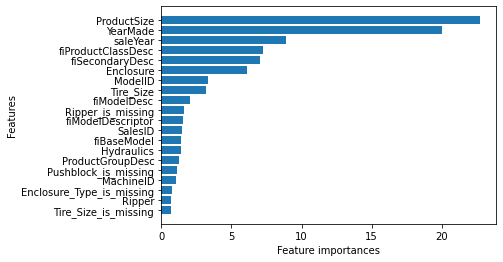

In [47]:
plot_features(X_train.columns,ideal_cat_model.feature_importances_)